In [1]:
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.9-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")

In [2]:
from pyspark.mllib.regression import LabeledPoint, LinearRegressionWithSGD, LinearRegressionModel
from pyspark import SparkContext, SparkConf
from pyspark.ml.regression import LinearRegression

In [3]:
# Load and parse the data
def parsePoint(line):
    values = [float(x) for x in line.replace(',', ' ').split(' ')]
    return LabeledPoint(values[0], values[1:])

In [4]:
def get_value(line):
    values = [float(x) for x in line.replace(',', ' ').split(' ')]
    return values[1:]

In [5]:
def toLabeledPoint(v):
    return LabeledPoint(v[0], v[1:])

In [6]:
# Load training data
data = sc.textFile("/Users/user/Desktop/Python Notebook/Pyspark/S&P500_index.csv")
parsedData = data.map(parsePoint)

In [7]:
# Build the model
model = LinearRegressionWithSGD.train(parsedData, iterations=10000000, step=0.00001)

/Users/user/Applications/spark-2.1.0/python/pyspark/mllib/regression.py:281: UserWarning: Deprecated in 2.0.0. Use ml.regression.LinearRegression.
  warnings.warn("Deprecated in 2.0.0. Use ml.regression.LinearRegression.")


In [8]:
# Evaluate the model on training data
valuesAndPreds = parsedData.map(lambda p: (p.features[0], model.predict(p.features)))

In [9]:
valuesAndPreds.take(1)

[(1845.1600000000001, 6368.0089815153597)]

In [10]:
parsedData.take(1)

[LabeledPoint(1.0, [1845.16])]

In [11]:
oriData = []
diffData = []
predData = []

normOri = []
normPred = []

In [12]:
for x in valuesAndPreds.collect():
    predData.append(x[1])

minPred = min(predData)
maxPred = max(predData)

for x in valuesAndPreds.collect():
    normPred.append((x[1]-minPred)/(maxPred-minPred))

In [13]:
for x in valuesAndPreds.collect():
    oriData.append(x[0])
    
minOri = min(oriData)
maxOri = max(oriData)

for x in valuesAndPreds.collect():
    normOri.append((x[0]-minOri)/(maxOri-minOri))

In [14]:
for x in range(len(oriData)):
    diffData.append(abs(oriData[x]-predData[x]))

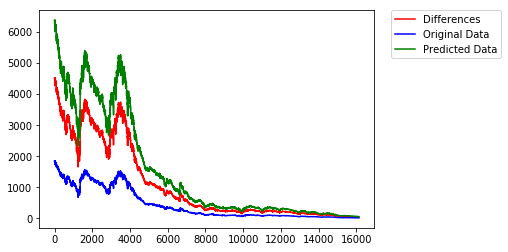

In [15]:
plt.plot(diffData, 'r', label='Differences')
plt.plot(oriData, 'b', label='Original Data')
plt.plot(predData, 'g', label='Predicted Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

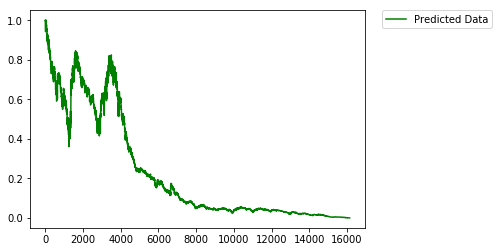

In [16]:
plt.plot(normPred, 'g', label='Predicted Data')
# plt.plot(normOri, 'b', label='Original Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()